In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Indian Earthquakes List Update_Magnitudes.csv', encoding='latin1', skiprows=10)
# df = df.drop(df.index[0])
df.columns=['S.No','Year', 'Month','Date','UTC','IST','magnitude','magnitude2','magnitude3','magnitude4','ms','ml','LAT(N)','LONG(E)','Depth(km)','MM','MMI','MME','Location','Reference' ]
df = df.drop(columns=['MM', 'MMI','MME','magnitude2','magnitude3','magnitude4','ms','ml','IST'])
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,5,7,9,10,11,12,13,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,S.No,Year,Month,Date,UTC,magnitude,LAT(N),LONG(E),Depth(km),Location,Reference
0,1,-2474,0,0.0,NaN,7.5000,71,24,0.0,NaN,Dr STGR
1,2,-325,0,0.0,NaN,7.5000,71,24,0.0,NaN,Dr STGR
2,3,25,0,0.0,NaN,7.5000,72.9,33.72,0.0,NaN,Dr STGR
3,4,26,5,10.0,08.19.10.0,6.1397,17.3,80.1,NaN,NaN,NEIC
4,5,26,5,10.0,08.19.10.0,6.1397,26,97,80.0,Myanmar,G-R


In [ ]:
df.describe(include='all')

,S.No,Year,Month,Date,UTC,magnitude,LAT(N),LONG(E),Depth(km),Location,Reference
count,52989.000000,52989.000000,52971.0,52932.000000,21186,40935.000000,52989.0,52989.0,50811.000000,9374,51407
unique,NaN,NaN,36.0,NaN,18093,NaN,14513.0,14688.0,NaN,1637,38
top,NaN,NaN,1.0,NaN,..,NaN,70.5,36.5,NaN,Myanmar,Dr STGR
freq,NaN,NaN,3454.0,NaN,8,NaN,120.0,224.0,NaN,1574,30468
mean,26480.004246,1991.584669,NaN,16.393958,NaN,4.537564,NaN,NaN,45.569867,NaN,NaN
std,15296.743693,41.964962,NaN,8.969178,NaN,0.625875,NaN,NaN,55.517009,NaN,NaN
min,1.000000,-2474.000000,NaN,0.000000,NaN,2.000000,NaN,NaN,0.000000,NaN,NaN
25%,13233.000000,1986.000000,NaN,9.000000,NaN,4.200000,NaN,NaN,10.000000,NaN,NaN
50%,26480.000000,1999.000000,NaN,16.000000,NaN,4.400000,NaN,NaN,33.000000,NaN,NaN
75%,39727.000000,2005.000000,NaN,25.000000,NaN,4.800000,NaN,NaN,55.000000,NaN,NaN


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52989 entries, 0 to 52988
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   S.No       52989 non-null  int64  
 1   Year       52989 non-null  int64  
 2   Month      52971 non-null  object 
 3   Date       52932 non-null  float64
 4   UTC        21186 non-null  object 
 5   magnitude  40935 non-null  float64
 6   LAT(N)     52989 non-null  object 
 7   LONG(E)    52989 non-null  object 
 8   Depth(km)  50811 non-null  float64
 9   Location   9374 non-null   object 
 10  Reference  51407 non-null  object 
dtypes: float64(3), int64(2), object(6)
memory usage: 4.4+ MB


In [ ]:
# 31.8°N, 10.6 N, 10.6N, 02.5°N, 12.3ｰN  , 18.1?, 18.1S 
def cleanLat(x):
    x=str(x)
    x=x.replace(',','.')
    x=x.replace('°','')
    x=x.replace('?','')
    x=x.replace('-','')
    if('N' in x):   return float(x.split('N')[0])
    if('S' in x):   return 0 - float(x.split('S')[0])
    return float(x)
def cleanLong(x):
    x=str(x)
    x=x.replace(',','.')
    x=x.replace('°','')
    x=x.replace('?','')
    x=x.replace('-','')
    x=x.replace('S','')
    if('E' in x):   return float(x.split('E')[0])
    if('W' in x):   return 0 - float(x.split('W')[0])
    return float(x)

def cat(x):
    if x<4.7:
        return 0
    else:
        return 1

df['LAT(N)'] = df['LAT(N)'].apply(cleanLat)
df['LONG(E)'] = df['LONG(E)'].apply(cleanLong)
df['magnitude'] = df['magnitude'].apply(cat)

# convert_dict = {'S.No': int, 
#                 'Year': int,
#                 'LAT(N)':float
#                } 
# df = df.astype(convert_dict) 



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52989 entries, 0 to 52988
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   S.No       52989 non-null  int64  
 1   Year       52989 non-null  int64  
 2   Month      52971 non-null  object 
 3   Date       52932 non-null  float64
 4   UTC        21186 non-null  object 
 5   magnitude  52989 non-null  int64  
 6   LAT(N)     52989 non-null  float64
 7   LONG(E)    52989 non-null  float64
 8   Depth(km)  50811 non-null  float64
 9   Location   9374 non-null   object 
 10  Reference  51407 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 4.4+ MB


In [ ]:
df.describe()

,S.No,Year,Date,magnitude,LAT(N),LONG(E),Depth(km)
count,52989.000000,52989.000000,52932.000000,52989.000000,52989.000000,52989.000000,50811.000000
mean,26480.004246,1991.584669,16.393958,0.483138,57.619317,52.035121,45.569867
std,15296.743693,41.964962,8.969178,0.499720,31.293989,52.500930,55.517009
min,1.000000,-2474.000000,0.000000,0.000000,-60.700000,-179.700000,0.000000
25%,13233.000000,1986.000000,9.000000,0.000000,26.750000,27.340000,10.000000
50%,26480.000000,1999.000000,16.000000,0.000000,70.390000,37.360000,33.000000
75%,39727.000000,2005.000000,25.000000,1.000000,90.790000,91.100000,55.000000
max,52974.000000,2019.000000,31.000000,1.000000,100.000000,9128.200000,831.200000


In [ ]:
df2 = df[['Year','LAT(N)','LONG(E)','Depth(km)','magnitude']]
df2 = df2.dropna(axis=0,how='any') 
print(df2.info())
print(df2.describe())
x=df2[['Year','LAT(N)','LONG(E)','Depth(km)']]
y=df2[['magnitude']]
print(x.head())
print(y.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50811 entries, 0 to 52988
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       50811 non-null  int64  
 1   LAT(N)     50811 non-null  float64
 2   LONG(E)    50811 non-null  float64
 3   Depth(km)  50811 non-null  float64
 4   magnitude  50811 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 2.3 MB
None
               Year        LAT(N)       LONG(E)     Depth(km)     magnitude
count  50811.000000  50811.000000  50811.000000  50811.000000  50811.000000
mean    1994.034048     59.167672     50.697023     45.569867      0.468816
std       38.612676     31.004081     53.175970     55.517009      0.499032
min    -2474.000000    -60.700000   -179.700000      0.000000      0.000000
25%     1989.000000     27.700000     26.315000     10.000000      0.000000
50%     2000.000000     70.740000     36.940000     33.000000      0.000000
75%     2005.000000     9

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# model = KNeighborsClassifier(n_neighbors=3)
# model.fit(x_train,y_train)
# predicted= model.predict(x_test)

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
predicted= model.predict(x_test)

# from sklearn.svm import SVC
# model = SVC()
# model.fit(x_train,y_train)
# predicted= model.predict(x_test)

# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier()
# model.fit(x_train,y_train)
# predicted= model.predict(x_test)

# from sklearn.dummy import DummyClassifier
# model = DummyClassifier()
# model.fit(x_train,y_train)
# predicted= model.predict(x_test)
                       

In [ ]:
# print(predicted[:5])
# print(y_test[:5])
from sklearn.metrics import confusion_matrix
print(confusion_matrix(predicted, y_test))
from sklearn.metrics import accuracy_score
print(accuracy_score(predicted, y_test))

[[3818 1496]
 [1644 3205]]
0.6910361113844338


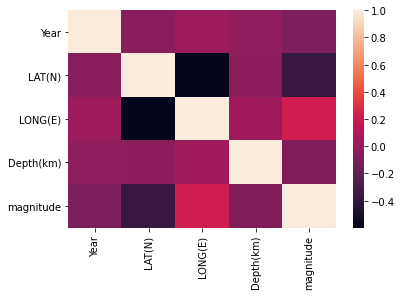

In [ ]:
df2.corr()
import seaborn as sns
sns.heatmap(df2.corr())

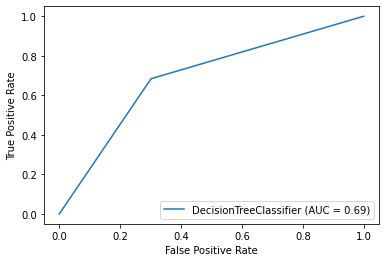

In [ ]:
from sklearn.metrics import roc_curve
# fpr, tpr, thresholds = roc_curve(predicted, y_test, pos_label=2)
# print(fpr)
# print(fpr)
# plt.plot(fpr, tpr)
from sklearn.metrics import plot_roc_curve
svc_disp = plot_roc_curve(model, x_test, y_test)